<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [59]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [60]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

Original Image Shape: (100, 100, 3)
img_single_channel Shape: (100, 100)


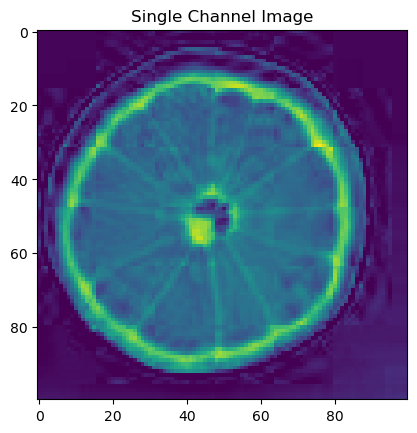

In [61]:
# Print the shape of the original image
print("Original Image Shape:", image.shape)

# Create img_single_channel by taking the last color channel
img_single_channel = image[:, :, -1]

# Print the shape of img_single_channel
print("img_single_channel Shape:", img_single_channel.shape)

# Plot img_single_channel
plt.imshow(img_single_channel)
plt.title("Single Channel Image")
plt.show()

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

img_average_channel Shape: (100, 100)


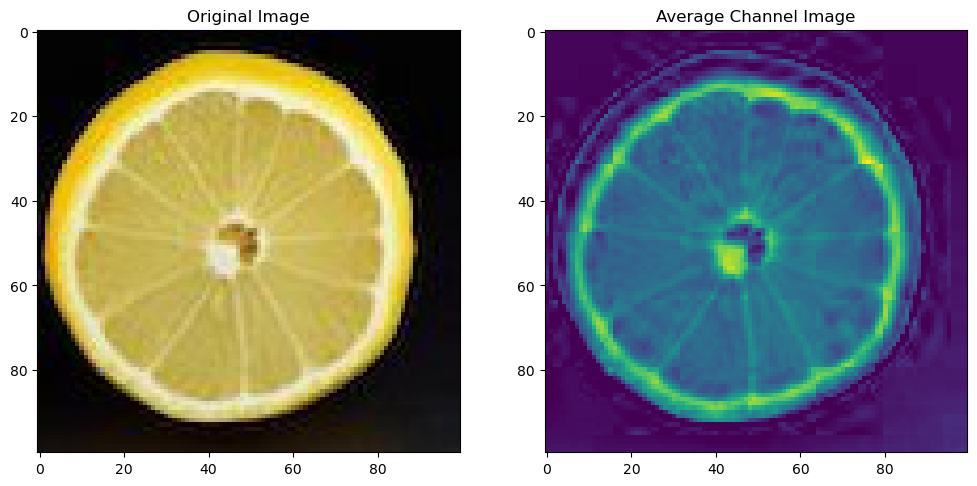

In [62]:
# Create img_average_channel by taking the average of all three color channels
img_average_channel = np.mean(image, axis=2)

# Print the shape of img_average_channel
print("img_average_channel Shape:", img_average_channel.shape)

# Plot the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Plot img_average_channel
plt.subplot(1, 2, 2)
plt.imshow(img_single_channel)
plt.title("Average Channel Image")

plt.show()


Difference between two images - The original image preserves fine details, color variations, and the overall color richness where as the image in part 1 (single channel image) represents the image in terms of its luminance but without the color variations. Therefore, original image looks better.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

Identity Matrix - An identity matrix is a square matrix with 1s on its main diagonal and 0s elsewhere. 
When you multiply any matrix by an identity matrix, the original matrix remains unchanged. It serves as a "multiplicative identity" in matrix operations, similar to how multiplying a number by 1 leaves the number unchanged.

In [50]:

# Get the shape of img_average_channel
rows, cols = img_average_channel.shape

# Create an identity matrix with the same size
identity_matrix = np.eye(rows, cols)

# Print a random row from identity_matrix
random_row_idx = np.random.randint(0, rows)
random_row = identity_matrix[random_row_idx, :]


print("\nRandom Row from Identity Matrix:")
print(random_row)


Random Row from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [63]:
# Get the number of rows in img_average_channel
num_rows = img_average_channel.shape[0]

# Create an array of numbers from 0 to N-1
rows = np.arange(num_rows)

# Shuffle the indices
np.random.shuffle(rows)

# Print the shuffled array
print("Shuffled Rows:")
print(rows)

Shuffled Rows:
[24 98 10 53 36 58 32 18 85 50 49 51 56 54 48 59 73 68 70 90  2 44 93 12
 37  3  7 84 69 64 55 72 34 15 99 91 89 26 78 77 19 60 71 40 52 17 87  5
 86 11 35 61 97 22  4 81 66 62 20 67 16 63 88 83  6  0 38 94 21 45 96 79
 65 14 31  9 95 46 43  8 75 30 27 23 28 80 33 29 82 41 25 42  1 57 74 13
 47 92 39 76]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [64]:
# Create matrix T from identity_matrix using the shuffled row indices
T = identity_matrix[rows]

# Check the shape of the result
print("Shape of T:", T.shape)

# If needed, reshape T to have the same size as img_average_channel
if T.shape != img_average_channel.shape:
    T = T.reshape(img_average_channel.shape)

# Sanity check: Ensure T has the same size as identity_matrix and img_average_channel
print("Shape of T after reshaping:", T.shape)


Shape of T: (100, 100)
Shape of T after reshaping: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


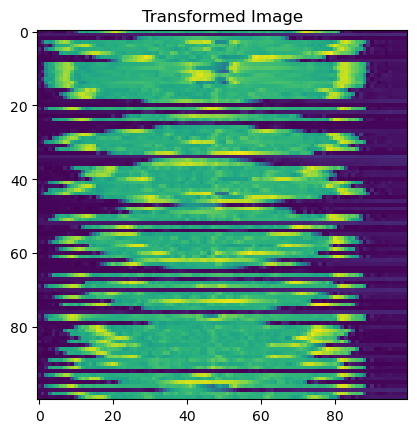

In [65]:
import matplotlib.pyplot as plt

# Matrix multiplication of T and img_average_channel
transformed_image = np.dot(T, img_average_channel)

# Check the shape of the result
print("Shape of transformed_image:", transformed_image.shape)



# Plot transformed_image
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.show()


## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Matrix T is invertible.


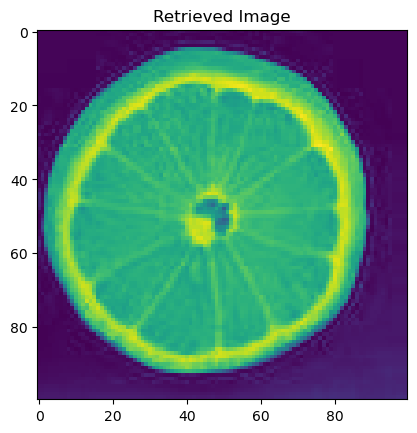

In [66]:
# Check if matrix T is invertible
det_T = np.linalg.det(T)

if det_T != 0:
    print("Matrix T is invertible.")
else:
    print("Matrix T is not invertible.")

    # Compute the inverse of matrix T
Tinv = np.linalg.inv(T)

# Retrieve the original image using Tinv
retrieved_image = np.dot(Tinv, transformed_image)

# Plot the retrieved image
plt.imshow(retrieved_image)
plt.title("Retrieved Image")
plt.show()



## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

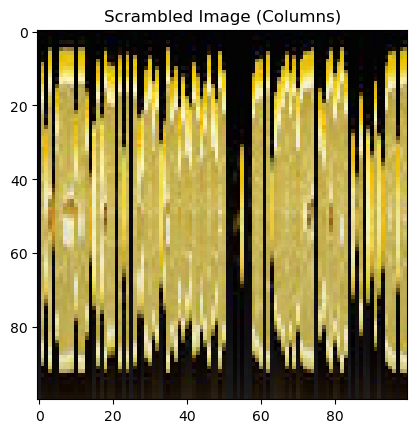

In [78]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the original image
image = np.array(Image.open('../../Images/lemon.jpeg'))

# Get the shape of the image
rows, cols, channels = image.shape

# Create an identity matrix with the same size as the image
identity_matrix = np.eye(cols)

# Create an array for column indices
col_indices = np.arange(cols)

# Shuffle the column indices
np.random.shuffle(col_indices)

# Create a matrix for column shuffling using np.ix_
T_cols = identity_matrix[:, col_indices]

# Transpose the image for matrix multiplication
image_transposed = image.transpose(0, 2, 1)

# Scramble the columns of the image by applying column shuffling
scrambled_image = np.dot(image_transposed, T_cols)

# Transpose the scrambled image back to its original shape
scrambled_image = scrambled_image.transpose(0, 2, 1)

# Plot the scrambled image (columns shuffled)
plt.imshow(scrambled_image.astype(np.uint8))  # Convert to uint8 for display
plt.title("Scrambled Image (Columns)")
plt.show()


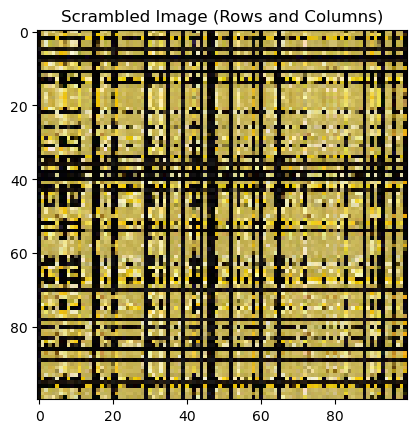

In [79]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the original image
image = np.array(Image.open('../../Images/lemon.jpeg'))

# Get the shape of the image
rows, cols, channels = image.shape

# Create identity matrices with the same size as the image for rows and columns
identity_matrix_rows = np.eye(rows)
identity_matrix_cols = np.eye(cols)

# Create arrays for row and column indices
row_indices = np.arange(rows)
col_indices = np.arange(cols)

# Shuffle the row and column indices
np.random.shuffle(row_indices)
np.random.shuffle(col_indices)

# Create matrices for row and column shuffling using np.ix_
T_rows = identity_matrix_rows[row_indices]
T_cols = identity_matrix_cols[:, col_indices]

# Split the image into color channels
color_channels = [image[:, :, i] for i in range(channels)]

# Scramble both rows and columns of each color channel
scrambled_channels = [np.matmul(np.matmul(T_rows, channel), T_cols) for channel in color_channels]

# Recombine the scrambled color channels
scrambled_image = np.stack(scrambled_channels, axis=-1)

# Plot the scrambled image
plt.imshow(scrambled_image.astype(np.uint8))  # Convert to uint8 for display
plt.title("Scrambled Image (Rows and Columns)")
plt.show()




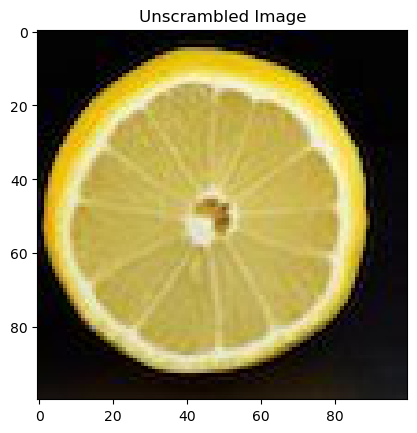

In [76]:
# Invert the operations to recover the original image
# To do this, we will use the inverse of T_rows and T_cols
T_rows_inv = np.linalg.inv(T_rows)
T_cols_inv = np.linalg.inv(T_cols)

# Unscramble both rows and columns of each color channel
unscrambled_channels = [np.matmul(np.matmul(T_rows_inv, channel), T_cols_inv) for channel in scrambled_channels]

# Recombine the unscrambled color channels
unscrambled_image = np.stack(unscrambled_channels, axis=-1)

# Plot the unscrambled image (should match the original)
plt.imshow(unscrambled_image.astype(np.uint8))  # Convert to uint8 for display
plt.title("Unscrambled Image")
plt.show()